# Prova de PMR3201 - 2020

## Instruções:

- Escreva nesta célula o seu nome e número USP. Nome:  
- A consulta ao material do curso e a qualquer outro material é livre.
Lembra-se no entanto que a prova é *individual*.
- Quando terminar submeta o arquivo .ipynb na tarefa apropriada no moodle.
- Você pode referenciar qualquer código que estiver em qualquer célula da prova.
- Não referencie métodos/atributos de classes iniciados por ```_``` a menos que o seu código faça parte da mesma.
- Você só deve usar métodos da biblioteca python que têm *complexidade constante*.
- Execute as células na ordem em que aparecem.
- A sua resposta para cada questão deve estar nas células com os comentários "# Complete seu código".
- Depois de cada célula a ser completada há um código que testará a sua resposta.
Caso o código não encontre erros, mostrará a mensagem ```Testes bem-sucedidos```.
Note que há limitações para os tipos de erros que podem ser encontrados.
Assim, sua resposta pode estar errada ainda que você receba esta mensagem.
- Do mesmo modo, para fins de avaliação de complexidade, alguns algoritmos são executados usando valores da classe ```MyFloat``` definida abaixo.
Esta classe implementa as operações de soma, subtração, multiplicação e divisão de ponto flutuante, bem como as operações elementares de comparação.
Se o seu código tentar usar qualquer outra operação os testes *irão falhar*.
Isso não significa necessariamente que o seu código está errado.
No entanto, *todas* as questões desta prova podem ser resolvidas com dados que usam apenas as operações definidas por ```MyFloat```.
- Sim, a prova vale 10,5.

## Nome: Victor Nascimento Pereira      

## NUSP: 10773530

In [5]:
# Execute esta célula para preparar o ambiente
class ErroCorrecao(Exception):
  pass

import traceback
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from random import randint
# Esta classe conta operações de comparação, adição e multiplicação para ajudar a avaliar a complexidade do código
class MyFloat:
  ccount = 0
  mcount = 0
  acount = 0
  dcount = 0
  def __init__(self, x):
    self._x = float(x)
  def __str__(self):
    return str(self._x)
  def __repr__(self):
    return repr(self._x)
  def __ne__(self, x):
    MyFloat.ccount+=1
    return self._x != float(x)
  def __eq__(self, x):
    MyFloat.ccount+=1
    return self._x == float(x)
  def __le__(self, x):
    MyFloat.ccount+=1
    return self._x <= float(x)
  def __lt__(self, x):
    MyFloat.ccount+=1
    return self._x < float(x)
  def __ge__(self, x):
    MyFloat.ccount+=1
    return self._x >= float(x)
  def __gt__(self, x):
    MyFloat.ccount+=1
    return self._x > float(x)
  def __float__(self):
    return self._x
  def __add__(self, x):
    MyFloat.acount += 1
    return self._x + float(x)
  def __radd__(self, x):
    MyFloat.acount += 1
    return self._x + float(x)
  def __sub__(self, x):
    MyFloat.acount += 1
    return self._x - float(x)
  def __rsub__(self, x):
    MyFloat.acount += 1
    return float(x) - self._x  
  def __mult__(self, x):
    MyFloat.mcount += 1
    return self._x * float(x)
  def __rmult__(self, x):
    MyFloat.mcount += 1
    return self._x * float(x)
  def __div__(self, x):
    MyFloat.dcount += 1
    return self._x / float(x)
    


# Questão 1 (3,5)

Seja $A = \left\{a_0, \ldots a_{n-1}\right\}$ uma seqûencia de $n$ números.

Uma subsequência *contígua* estritamente crescente é dada por $\left\{a_e, a_{e+1}, \ldots a_d \right\}$ tal que $a_{i+1} > a_i$ para $e\leq i < d$ (Note que aqui exige-se que não haja intervalo na subsequência).

O a função ```maior_subsequencia_cubico``` definida no código abaixo encontra o tamanho da subsequência *contígua* estritamente crescente mais longa:

In [6]:
# Verifica se a sequência é estritamente crescente entre e e d (excluso)
# Complexidade linear
def verifica_crescente(a, e, d):
  antigo = a[e]
  for i in range(e+1, d):
    if a[i]<=antigo:
      return False
    antigo = a[i]
  return True

# Atenção! Este código é *particularmente* ineficiente!
# A complexidade é cúbica!
def maior_subsequencia_cubico(a):
  maior = 1 # Toda subsequência unitária é crescente
  for e in range(len(a)):
    for d in range(e+1, len(a)+1):
      if verifica_crescente(a, e, d):
        if maior < d-e:
          maior = d-e
  return maior

Alguns exemplos:

In [7]:
print(maior_subsequencia_cubico([2,1,1]))
print(maior_subsequencia_cubico([1,2,2]))
print(maior_subsequencia_cubico([1,2,3,1,2,3,4,4,1,2]))

1
2
4


Este código tem complexidade cúbica e é portanto muito ineficiente.
De fato é possível resolver o problema com complexidade *linear*.

Implemente a função ```maior_subsequencia_linear(a)``` que encontra com complexidade linear o tamanho da maior subsequência contígua estritamente crescente en ```a```.


In [20]:
def maior_subsequencia_linear(a):
  # Complete seu código
    aux = a[0]
    c0 = 0
    c1 = 1
    maior = 1
    for i in range(1, len(a)):
        if a[i] > aux:
            c1 += 1
            if c1 > maior:
                maior = c1
        else:
            c0 = i
            c1 = 1
        aux = a[i]
    return maior


Teste sua solução:

Testes bem-sucedidos


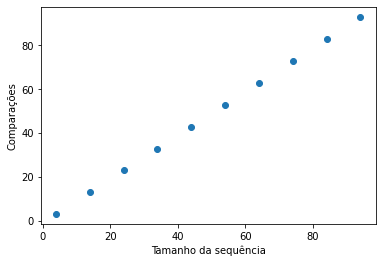

In [21]:
def mostra_entrada_q1():
  print("sequência:")
  print(seq)
# 1 testes com valores pré-computados:
data = [[2,1,1], [1,2,2], [1,2,3,1,2,3,8,8,1,2], [5,4,3,2,1], [5,1,2,3,5]]
try:
  for seq in data:
    res = maior_subsequencia_linear(seq)
    try:
      ires = int(res)
    except:
      raise ErroCorrecao("Sua função não retornou um inteiro!")
    val = maior_subsequencia_cubico(seq)
    if ires != val:
      raise ErroCorrecao("Sua função retornou o valor " + str(ires) + ". O esperado era " + str(val))
# 2 testes com valores aleatórios e estimativa de complexidade:
    tamanhos = []
    ops = []
    for j in range(4, 100, 10):
      maxop = 0
      for i in range(20):
        seq = []
        for k in range(j):
          seq.append(MyFloat(np.random.randint(10)))
        antes = MyFloat.ccount
        res = maior_subsequencia_linear(seq)
        operacoes = MyFloat.ccount-antes
        if maxop<operacoes:
          maxop = operacoes     
        try:
          ires = int(res)
        except:
          raise ErroCorrecao("Sua função não retornou um inteiro!")
        val = maior_subsequencia_cubico(seq)
        if ires != val:
          raise ErroCorrecao("Sua função retornou o valor " + str(ires) + ". O esperado era " + str(val))
      tamanhos.append(j)
      ops.append(maxop)
  print("Testes bem-sucedidos")
  plt.scatter(tamanhos, ops)
  plt.xlabel("Tamanho da sequência")
  plt.ylabel("Comparações")
except ErroCorrecao as ex:
  print(ex)
  mostra_entrada_q1()
except Exception as e:
  print("Sua função lançou uma exceção:")    
  print(''.join(traceback.format_exception(type(e),e,e.__traceback__)))
  mostra_entrada_q1()

# Questão 2 (3,5)

Um heap binário é uma árvore binária completa (todos os níveis exceto o último cheios) preenchido da esquerda para a direita na qual cada nó é maior ou igual a seus filhos.
Heaps binários são armazenados em vetores, resultantes da varredura da árvore binária *em largura*.
Dada a rígida estrutura, é possível converter um vetor em árvore e vice-versa.

De fato, nessa estrutura os dois filhos do elemento de índice $i$ estão armazenados sob os índices $2i+1$ e $2i+2$.
Do mesmo modo, o pai do elemento de índice $i$ está no índice $\left\lfloor \frac{i-1}{2} \right\rfloor$.

O código abaixo usa um heap binário para implementar uma *fila de prioridades*.
A função ```adiciona_elemento(heap, elemento)``` adiciona um novo elemento à fila.
Ela o faz adicionando um elememento ao final da sequência que forma o heap e "conserta" o heap comparando o elemento adicionado com os seus antepassados até que este encontre a sua devida posição.

Note que a função ```adiciona_elemento(heap, elemento)``` faz no máximo $\left\lfloor \log_2 \left(n+1\right) \right\rfloor$ comparações entre os elementos para inserir um novo elemento na fila, onde $n$ é a quantidade de elementos existentes.

A função ```remove_elemento(heap)``` remove o elemento de *maior* valor da fila.
Ela o faz trocando o primeiro (e consequentemente maior) elemento da sequência com o último.
Em seguida "conserta" o heap movendo o último elemento, adicionado ao topo do heap, para baixo até que este encontre sua devida posição. 

In [35]:
def adiciona_elemento(heap, elemento):
  # Adiciona ao final e conserta "para cima"
  heap.append(elemento)
  filho = len(heap)-1
  pai = (filho - 1)//2
  while pai >= 0:
    # Se o filho for maior que o pai, troca de posição
    if heap[pai] < heap[filho]:
      temp = heap[filho]
      heap[filho] = heap[pai]
      heap[pai] = temp
    else:
        break
    filho = pai
    pai = (filho - 1)//2

def retira_elemento(heap):
  # Troca o primeiro com o último e conserta "para baixo"
  res = heap[0]
  heap[0] = heap[-1]
  heap.pop()
  pai = 0
  filho_esquerda = 1
  filho_direita = 2
  while filho_direita < len(heap):
    # Encontra o maior dos filhos
    maior_filho = filho_direita if heap[filho_direita]>heap[filho_esquerda] else filho_esquerda
    if heap[maior_filho]>heap[pai]: # Troca se for maior que o pai
      temp = heap[maior_filho]
      heap[maior_filho] = heap[pai]
      heap[pai] = temp
      pai = maior_filho
    else: # Senão acabou
      break
    filho_esquerda = 2*pai+1
    filho_direita = 2*pai+2
  # Note que pode restar uma árvore incompleta ao final
  if filho_esquerda < len(heap) and heap[filho_esquerda]>heap[pai]:
    temp = heap[filho_esquerda]
    heap[filho_esquerda] = heap[pai]
    heap[pai] = temp
  return res
      

Alguns exemplos:

In [ ]:
heap = []
adiciona_elemento(heap, 1)
print(heap)
adiciona_elemento(heap, 2)
print(heap)
adiciona_elemento(heap, 3)
print(heap)
adiciona_elemento(heap, 4)
print(heap)
print(retira_elemento(heap))
print(retira_elemento(heap))
print(retira_elemento(heap))
print(retira_elemento(heap))

[1]
[2, 1]
[3, 1, 2]
[4, 3, 2, 1]
4
3
2
1


Um heap *ternário*, analogamente, é uma árvore ternária (cada nó tem no máximo 3 elementos) completa (todos os níveis exceto o último cheios) preenchido da esquerda para a direita na qual cada nó é maior ou igual a seus filhos.

Em um heap ternário, os *três* filhos do elemento de índice $i$ estão armazenados sob os índices $3i+1$, $3i+2$ e $3i+3$.
Do mesmo modo, o pai do elemento de índice $i$ está no índice $\left\lfloor \frac{i-1}{3} \right\rfloor$.

Escreva as funções ```adiciona_elemento3(heap, elemento)``` e ```retira_elemento3(heap):``` que implementam respectivamente as operações de inserção e remoção de elementos em um heap ternário. Ambas devem ter complexidade logarítmica.

Note que a sua função ```adiciona_elemento3(heap, elemento)``` deve fazer no máximo $\left\lfloor \log_3 \left(2n+2\right) \right\rfloor$ comparações entre os elementos para inserir um novo elemento na fila, onde $n$ é a quantidade de elementos existentes.

In [39]:
def adiciona_elemento3(heap, elemento):
  # Complete seu código
  heap.append(elemento)
  filho = len(heap)-1
  pai = (filho - 1)//3
  while pai >= 0:
    # Se o filho for maior que o pai, troca de posição
    if heap[pai] < heap[filho]:
      temp = heap[filho]
      heap[filho] = heap[pai]
      heap[pai] = temp
    else:
        break
    filho = pai
    pai = (filho - 1)//3

def retira_elemento3(heap):
  # Complete seu código
    res = heap[0] # res = max(heap)
    heap[0] = heap[-1]
    heap.pop()
    pai = 0
    filho_esquerda = 1
    filho_meio = 2
    filho_direita = 3
    cont = 0
    achou = False
    while filho_direita < len(heap):
    # Encontra o maior dos filhos
        maior_filho = max([heap[filho_esquerda], heap[filho_meio], heap[filho_direita]]) 
        cont = 0
        achou = False
        while not achou:
            if heap[cont] == maior_filho:
                maior_filho = cont
                achou = True
            cont+=1
        if not achou:
            maior_filho = filho_esquerda
        if heap[maior_filho]>heap[pai]: # Troca se for maior que o pai
            temp = heap[maior_filho]
            heap[maior_filho] = heap[pai]
            heap[pai] = temp
            pai = maior_filho
        else: # Senão acabou
            break
        filho_esquerda = 3*pai+1
        filho_meio = 3*pai+2
        filho_direita = 3*pai+3
    # Note que pode restar uma árvore incompleta ao final
    if filho_esquerda < len(heap) and heap[filho_esquerda]>heap[pai]:
        temp = heap[filho_esquerda]
        heap[filho_esquerda] = heap[pai]
        heap[pai] = temp
    return res

Teste sua resposta:

In [40]:
def mostra_entrada_q2():
  print("Heap antes da operação:")
  print(antes)
  if elemento is not None:
    print("Elemento adicionado: " + str(elemento))
try:
  #1: testa com heaps pré-computados
  dados_insercao =[[1], [2, 1], [3, 1, 2], [4, 1, 2, 3], [5, 4, 2, 3, 1], [6, 5, 2, 3, 1, 4], [7, 6, 2, 3, 1, 4, 5], [8, 6, 7, 3, 1, 4, 5, 2], [9, 6, 8, 3, 1, 4, 5, 2, 7]]
  dados_remocao = [[8, 6, 7, 3, 1, 4, 5, 2],[7, 6, 2, 3, 1, 4, 5],[6, 5, 2, 3, 1, 4],[5, 4, 2, 3, 1],[4, 1, 2, 3],[3, 1, 2],[2, 1],[1],[]]
  heap=[]
  for i in range(1, 10):
    antes = list(heap)
    elemento = i
    adiciona_elemento3(heap, i)
    if heap != dados_insercao[i-1]:
      raise ErroCorrecao("O resultado da adição de um elemento foi o heap " + str(heap) + ". O esperado era " + str(dados[i-1]))
  elemento = None
  for i in range(9):
    antes = list(heap)
    ret = retira_elemento3(heap)
    if ret != 9-i:
      raise ErroCorrecao("O elemento retirado do heap foi " + str(ret) + ". O esperado era " + str(9-i))
    if heap != dados_remocao[i]:
      raise ErroCorrecao("O heap após remoção é " + str(heap) + ". O esperado era " + str(dados_remocao[i]))
  #2: testa com dados aleatórios
  for i in range(40):
    heap = []
    values = []
    for j in range(43):
      compant = MyFloat.ccount
      antes = list(heap)
      values.append(np.random.uniform())
      adiciona_elemento3(heap, MyFloat(values[-1]))
      comparacoes = MyFloat.ccount - compant
      max_comparacoes = int(np.log(2*j+2)/np.log(3))
      if max_comparacoes < comparacoes:
        raise ErroCorrecao("Sua função usou " + str(comparacoes) + " comparações para inserir um elemento no heap. O máximo deveira ser " + str(max_comparacoes))
      if len(heap)!=len(values):
        raise ErroCorrecao("O heap após a inserção tem tamanho " + str(len(heap)) + ". O esperado era " + str(len(values)))
    values.sort()
    elemento = None
    for j in range(43):
      expected=values.pop()
      antes = list(heap)
      ret = retira_elemento3(heap)
      if float(ret) != expected:
        raise ErroCorrecao("O elemento retirado do heap foi " + str(ret) + ". O esperado era " + str(expected))
      if len(heap) != 42-j:
        raise ErroCorrecao("O heap após uma remoção tem tamanho " + str(len(heap)) + ". O esperado era " + str(42-j))
  print("Testes bem-sucedidos")
except ErroCorrecao as ex:
  print(ex)
  mostra_entrada_q2()
except Exception as e:
  print("Sua função lançou uma exceção:")    
  print(''.join(traceback.format_exception(type(e),e,e.__traceback__)))
  mostra_entrada_q2()



O elemento retirado do heap foi 0.011197442351014164. O esperado era 0.01783832752282788
Heap antes da operação:
[0.011197442351014164, 0.0010162713804572343, 0.01783832752282788]


# Questão 3 (3,5)

Uma pilha é uma estrutura de dados na qual o *último* objeto inserido é o *primeiro* a ser removido.

A classe ```Pilha```, definida no código abaixo, implementa uma pilha usando uma sequência de Python:

In [41]:
class Pilha():
  def __init__(self):
    self._v = []

  def push(self, x):
    self._v.append(x)
  
  def pop(self):
    return self._v.pop()
  
  def __len__(self):
    return len(self._v)
  
  def top(self):
    return self._v[-1]

O método ```push``` adiciona um novo elemento à pilha.
O método ```pop``` retira e retorna o elemento mais recentemente adicionado.
O método ```__len__``` (acessado como ```len(pilha)```) retorna a quantidade de elementos armazenados.
Finalmente o método ```top``` retorna o elemento mais recentemente adicionado, sem retirá-lo da pilha.

Todos estes métodos têm complexidade *constante*.

Alguns exemplos de operação da classe:

In [42]:
a = Pilha()
a.push(0)
a.push(1)
a.push(2)
a.push(3)
print(len(a))
print(a.pop())
print(a.pop())
print(a.pop())
print(a.pop())

4
3
2
1
0


Crie uma classe ```PilhaMax``` que implementa *todos* os métodos da classe ```Pilha``` e adicionalmente o método ```max``` que retorna o *maior* elemento armazenado na pilha (sem retirá-lo).

*Todos* os métodos, inclusive ```max```, devem ser executados com *complexidade constante*.

In [43]:
class PilhaMax():
  def __init__(self):
    # Complete o seu código
    self._v=[]

  def max(self):
    # Complete o seu código
    return max(self._v)

  def push(self, x):
    # Complete o seu código
    self._v.append(x)
  
  def pop(self):
    # Complete o seu código
    return self._v.pop()    
  
  def __len__(self):
    # Complete o seu código
    return len(self._v)
  
  def top(self):
    # Complete o seu código
    return self._v[-1]

Teste seu código:

Testes bem-sucedidos


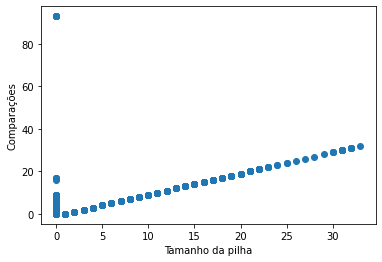

In [44]:
# Testa com operações aleatórias:
def mostra_entrada_q3():
  print("A pilha antes da operação era:")
  print(copia_pilha)
  if ins is not None:
    print("A operação foi de push("+str(ins)+")")
  else:
    print("A operação foi de pop()")
try:
  ll = []
  ops = []
  for i in range(40):
    pilha = Pilha()
    pp = PilhaMax()
    for j in range(100):
      ant = MyFloat.ccount
      copia_pilha = list(pilha._v)
      if np.random.randint(2):  # Cara ou coroa
        ins = np.random.randint(50)
        pilha.push(ins)
        pp.push(MyFloat(ins))
      else:
        ins = None
        if len(pilha):
          ret = pp.pop()
          try:
            rret = float(ret)
          except:
            raise ErroCorrecao("Seu método pop não retornou um número")
          g = pilha.pop()
          if rret!=g:
            raise ErroCorrecao("Seu método pop retornou" + str(rret) + ". O esperado era " + str(g))
      if len(pilha)!=len(pp):
        raise ErroCorrecao("Sua pilha tem tamanho " + str(len(pp)) + ". O esperado era"  + str(len(pilha)))
      if len(pp):
        mx = pp.max()
        try:
          mmax = float(mx)
        except:
          raise ErroCorrecao("Seu método max não retornou um número")
        operacoes = MyFloat.ccount - ant
        if mmax != max(pilha._v):
          raise ErroCorrecao("Seu método max retornou " + str(mmax) + ". O esperado era" + str(max(pilha._v)))
      ll.append(len(pp))
      ops.append(operacoes)
  print("Testes bem-sucedidos")
  plt.scatter(ll, ops)
  plt.xlabel("Tamanho da pilha")
  plt.ylabel("Comparações")
except ErroCorrecao as ex:
  print(ex)
  mostra_entrada_q3()
except Exception as e:
  print("Sua função lançou uma exceção:")    
  print(''.join(traceback.format_exception(type(e),e,e.__traceback__)))
  mostra_entrada_q3()    
         
